# Misaligned gear

[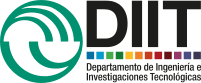](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

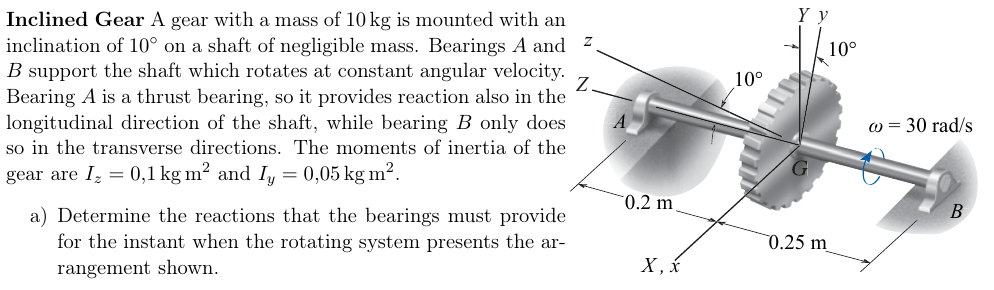

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me
me.init_vprinting() # dot notation for velocity and acceleration

## Euler-Lagrange equations for rotation

The three equations for each coordinate in the system $i, j, k$
$$
I_i \dot{\Omega}_i - (I_j - I_k) \Omega_j \Omega_k = \tau_i
$$
have to be applied in the coordinate system determined to be the most suitable for the analysis.

The selection of such a system is based on how easy it is to determine:
- moments of inertia $I_i$
- components of rotational angular velocity, $\Omega_i$, and angular acceleration, $\dot{\Omega}_i$ 
- components of torque $\tau_i$

### Coordinate system for the piece

#### Axes aligned with the bench where the piece is mounted on

The cartesian system $X, Y, Z$ (uppercase letters) is fixed to the bench where the piece is mounted.

The $\hat{Z}$ of this system is aligned with the axis of this device. Therefore, the constant angular velocity is $\vec{\Omega} = \omega \hat{Z} = 30 \mathrm{s^{-1}} \hat{Z}$.

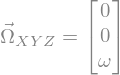

In [2]:
omega =  sm.Symbol('omega')
angularVelocity_XYZ = sm.Eq(
  sm.Symbol(r'\vec{\Omega}_{XYZ}'),
  sm.Matrix([0, 0, omega]),
  evaluate=False
  )
angularVelocity_XYZ

#### Axes aligned with the gear

The advantage of using the system $x, y, z$ is that of the axes is aligned with the normal to the gear, and there is no need to apply rotations to the inertia tensor, that can be extracted from a table.
This problem considers the gear as a plane object and the moments of inertia $I_x, I_y$ and $I_z$ given in the instructions can be used without modifications in the system of Euler-Lagrange equations.

$$
\left\{
  \begin{aligned}
  I_x \dot{\Omega}_x
  - (I_y - I_z) \Omega_y \Omega_z 
  &= \tau_x\\
  I_y \dot{\Omega}_y
  - (I_z - I_x) \Omega_z \Omega_x
  &= \tau_y\\
  I_z \dot{\Omega}_z
  - (I_x - I_y) \Omega_x \Omega_y
  &= \tau_z
  \end{aligned}
\right.
$$

In [3]:
I_x, I_y, I_z = sm.symbols('I_x I_y I_z')
Omega_x, Omega_y, Omega_z = sm.symbols('Omega_x Omega_y Omega_z')
Omega_p_x, Omega_p_y, Omega_p_z = sm.symbols('\dot{\Omega}_x \dot{\Omega}_y \dot{\Omega}_z')
tau_x, tau_y, tau_z = sm.symbols('tau_x tau_y tau_z')

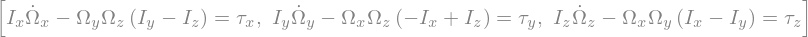

In [4]:
EL_x = sm.Eq(
  I_x * Omega_p_x - (I_y - I_z) * Omega_y * Omega_z,
  tau_x,
  evaluate = False
  )
EL_y = sm.Eq(
  I_y * Omega_p_y - (I_z - I_x) * Omega_z * Omega_x,
  tau_y,
  evaluate = False
  )
EL_z = sm.Eq(
  I_z * Omega_p_z - (I_x - I_y) * Omega_x * Omega_y,
  tau_z,
  evaluate = False
  )
EL = [EL_x, EL_y, EL_z]
EL

Since the gear is fixed to the rotating axle, the coordinate system $x, y, z$ (lowercase letters), as seen from the bench (laboratory frame of reference), describes a rotation such that $\hat{x}$ deviates from the $\hat{X}$ on the bench, and they coincide after a period $\dfrac{2 \pi}{\omega}\,\mathrm{s}$.  

## Angular velocity

**The Euler-Lagrange equation will be written in the system aligned with the gear ($x$, $y$, $z$)**, so we have to decompose $\vec{\Omega} = \omega \hat{Z} = 30 \mathrm{s^{-1}} \hat{Z}$.

For this, we only need the **projection of $\hat{Z}$**
$$
\hat{Z} = \cos{\theta} \hat{z} + \sin{\theta} \hat{y}
$$
where $\theta = -10^\circ \times \frac{\pi}{180^\circ}$

We call the coordinate system aligned with the axis, which is denoted with capital letters, system __M__.
For the one aligned with the gear we will use __m__, which we will define by rotating $\theta$ around the $\hat{X}$ axis of system M.

In [5]:
# Cartesian system
M = sm.physics.vector.ReferenceFrame('M')
theta, omega =  sm.symbols('theta omega')
m = M.orientnew('m', 'Axis', [theta, M.x]) # this is the new system rotating about x of system M (old).

The rotation matrix around the $\hat{X}$ axis by $\theta$ is

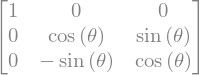

In [6]:
m.dcm(M)

which gives

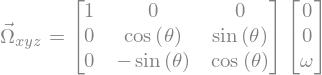

In [7]:
angularVelocity_xyz = sm.Eq(
  sm.Symbol(r'\vec{\Omega}_{xyz}') ,
  sm.MatMul(m.dcm(M), angularVelocity_XYZ.rhs) ,
  evaluate = False
  )
angularVelocity_xyz

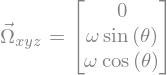

In [8]:
sm.Eq(
  angularVelocity_xyz.lhs,
  angularVelocity_xyz.rhs.doit(),
  evaluate= False
  )

The module for mechanics in `sympy` has a function that performs this in a single step.
We just need to write the vector in the rotated system, $m$.

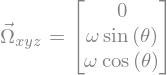

In [9]:
angularVelocity_XYZ_vector = omega* M.z # the vector in the original system XYZ
angularVelocity_xyz = sm.Eq(
  sm.Symbol(r'\vec{\Omega}_{xyz}') , 
  angularVelocity_XYZ_vector.to_matrix(m) , # it writes it in the rotated system, N
  evaluate = False
  )
angularVelocity_xyz

We will even see later that operations can be performed, such as vector and scalar products, between vectors and unit vectors in both reference systems.
The `mechanics` module is responsible for calculating the projections.
It is not necessary to present the results in matrix notation with the `.to_matrix()` method.
We use it because they show the results in an organized form, but they are not essential.

## Angular acceleration

In the Euler-Lagrange equations for the rotation, we have to determine the components of $\vec{\Omega}_{xyz}$ and also the components of the angular acceleration, $\dot{\vec{\Omega}}_{xyz}$.

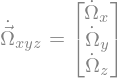

In [10]:
Omega_p_x, Omega_p_y, Omega_p_z = sm.symbols('\dot{\Omega}_x \dot{\Omega}_y \dot{\Omega}_z')
angularAcceleration_xyz = sm.Eq(
  sm.Symbol(r'\dot{\vec{\Omega}}_{xyz}'),
  sm.Matrix([Omega_p_x, Omega_p_y, Omega_p_z]),
  evaluate = False
  )
angularAcceleration_xyz

The instructions require the calculation of the reaction forces at the instant shown in the figure, but the specific instant doesn't matter for $\vec{\Omega}_{xyz}$, the result is the same for any orientation of the gear.
In other words, the components are constant, thus, their derivatives with respect to time are zero: $\dot{\omega}_x =0$, $\dot{\omega}_y =0$ and $\dot{\omega}_z =0$.


In [11]:
angularAcceleration_xyz_constantVelocity = {
  Omega_p_x: 0,
  Omega_p_y: 0,
  Omega_p_z: 0,
}

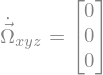

In [12]:
angularAcceleration_xyz = sm.Eq(
  angularAcceleration_xyz.lhs,
  angularAcceleration_xyz.rhs.subs(angularAcceleration_xyz_constantVelocity),
  evaluate=False
)
angularAcceleration_xyz

## Torques

### Forces exerted upon the system

In addition to the weight force that is considered to act on the center of the gear, point $G$, the reactions at bearings $A$ and $B$ must be decomposed. These components $A_i$​ and $B_i$​ are shown schematically in the figure.

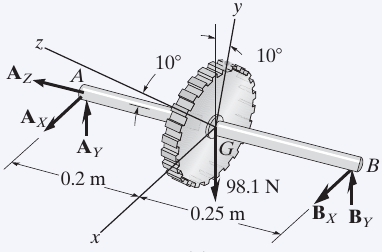

The proposed reactions are written in a system aligned with the axle:
- At $A$, $F_{A} = A_x \hat{X} + A_y \hat{Y} + A_z \hat{Z}$
- At $B$, $F_{B} = B_x \hat{X} + B_y \hat{Y}$

In [13]:
# reaction  forces at the bearings
A_X, A_Y, A_Z = sm.symbols('A_X A_Y A_Z')
F_A = A_X* M.x + A_Y* M.y + A_Z* M.z
F_A

In [14]:
B_X, B_Y = sm.symbols('B_X B_Y')
F_B = B_X* M.x + B_Y* M.y
F_B

### Torque in the system fixed to the bench

We calculate the torque from point $G$ at the center of the gear $\vec{\tau}_G$ exerted by the reactions.

In that system, the points where the reactions are exerted are expressed from the center of the gear $G$
- to point $A$ the vector is $\vec{r}_{\overline{GA}} = d_{GA} \hat{Z} = 0.2\,\mathrm{m} \hat{Z}$
- to point $B$ the vector is $\vec{r}_{\overline{GB}} = - d_{GB} \hat{Z} = - 0.25\,\mathrm{m} \hat{Z}$

In [15]:
# distances between gear and bearings
d_GA, d_GB = sm.symbols('d_{GA} d_{GB}')
r_GA = d_GA* M.z
r_GB = d_GB* (-M.z)

The torque is a function of the applied forces and the position where they are applied $\vec{\tau}_G = \sum_i \vec{r}_i \times \vec{F}_i$

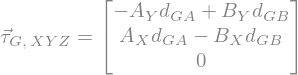

In [16]:
# torque in system M
torque_G_XYZ_vector = r_GA.cross(F_A) + r_GB.cross(F_B)
torque_G_XYZ = sm.Eq(
  sm.Symbol(r'\vec{\tau}_{G,\,XYZ}'),
  torque_G_XYZ_vector.to_matrix(M),
  evaluate = False
  )
torque_G_XYZ

We can check that this the correct result.
$$
\begin{aligned}
\vec{\tau}_G = \sum_i \vec{r}_i \times \vec{F}_i 
= \vec{r}_{\overline{GA}} \times \vec{F}_A
&+ \vec{r}_{\overline{GB}} \times \vec{F}_B \\
= \vec{r}_{\overline{GA}} \times \left( A_X \hat{X} + A_Y \hat{Y} + A_Z \hat{Z} \right)
 &+ \vec{r}_{\overline{GB}} \times \left( B_X \hat{X} + B_Y \hat{Y} \right) \\
= \left( \vec{r}_{\overline{GA}} \times A_X \hat{X} \right) + \left( \vec{r}_{\overline{GA}} \times A_Y \hat{Y} \right)
 &+ \left( \vec{r}_{\overline{GB}} \times B_X \hat{X} \right) + \left( \vec{r}_{\overline{GB}} \times B_Y \hat{Y} \right) \\
= \left( d_{GA} A_X \hat{Y} \right) + \left( - d_{GA} A_Y \hat{X} \right)
 &+ \left( - d_{GB} B_X \hat{Y} \right) + \left( d_{GB} B_Y \hat{X} \right) \\
= \left( - d_{GA} A_Y + d_{GB} B_Y \right) \hat{X}
 &+ \left( d_{GA} A_X - d_{GB} B_X  \right) \hat{Y} \\
\end{aligned}
$$

### Torque in the system aligned with the gear

To decompose $\vec{\tau}_{G, XYZ}$ in the system aligned with the gear, we apply the rotation matrix that transforms the axes aligned to the axle to the axes aligned with the gear.

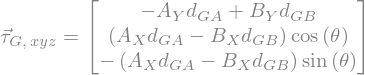

In [17]:
torque_G_xyz = sm.Eq(
  sm.Symbol(r'\vec{\tau}_{G,\,xyz}') ,
  torque_G_XYZ_vector.to_matrix(m) ,
  evaluate = False
  )
torque_G_xyz

Again, we can check that this is the correct result:
$$
\hat{X} = \hat{x}\\
\hat{Y} = \cos{\theta} \hat{y} - \sin{\theta} \hat{z} ,
$$

to find the torque in the system aligned to the gear $\vec{\tau}_{G, xyz}$: 

$$
\begin{aligned}
\vec{\tau}_{G, xyz} = \vec{r} \times \vec{F} 
&= \left( - d_{GA} A_Y + d_{GB} B_Y \right) \hat{x}
 + \left( d_{GA} A_X - d_{GB} B_X  \right) \left( \cos{\theta} \hat{y} - \sin{\theta} \hat{z} \right)\\
&= \left( - d_{GA} A_Y + d_{GB} B_Y \right) \hat{x}
 + \left( d_{GA} A_X - d_{GB} B_X  \right) \cos{\theta} \hat{y} 
 - \left( d_{GA} A_X - d_{GB} B_X  \right) \sin{\theta} \hat{z}\\
\end{aligned}
$$

## Solving the system of equations

### Substitutions in the Euler-Lagrange equations

We will substitute the known values in the Euler-Langrange equations. Let's start with the angular acceleration pseudovector. 

In [18]:
angularAcceleration_xyz_magnitudes = {
  Omega_p_x: angularAcceleration_xyz.rhs[0],
  Omega_p_y: angularAcceleration_xyz.rhs[1],
  Omega_p_z: angularAcceleration_xyz.rhs[2],
}

In [19]:
EL_subs = [eq.subs(angularAcceleration_xyz_magnitudes) for eq in EL]
EL_subs

We do it for the angular velocity too.

In [20]:
angularVelocity_xyz_magnitudes = {
  Omega_x: angularVelocity_xyz.rhs[0],
  Omega_y: angularVelocity_xyz.rhs[1],
  Omega_z: angularVelocity_xyz.rhs[2],
}

In [21]:
EL_subs = [eq.subs(angularVelocity_xyz_magnitudes) for eq in EL_subs]
EL_subs

Last, we have the torque in the system $xyz$.

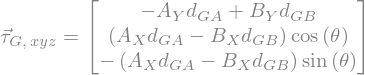

In [22]:
torque_G_xyz

In [23]:
torques_dict = {
  tau_x: torque_G_xyz.rhs[0],
  tau_y: torque_G_xyz.rhs[1],
  tau_z: torque_G_xyz.rhs[2],
}

In [24]:
EL_subs = [eq.subs(torques_dict) for eq in EL_subs]
EL_subs

Before substituting the numerical values, we will proceed in a similar way in Newton's second law equations.

### Newton's second law

We also have the three equations from Newton's second law in the axes fixed to the bench ($X,Y,Z$).

$$
\left\{
\begin{aligned}
A_X + B_X &= m a_X = 0\\
A_Y + B_Y - m g &= m a_Y = 0\\
A_Z &= m a_Z = 0
\end{aligned}
\right.
$$
where $a_X = a_Y = 0$ since that's what the bearings are for.
On the other hand, $a_Z = 0$ is _a hunch_ since we don't have data regarding this, but it's reasonable if the shaft is expected not to come out of the bearings.

In [25]:
m, g = sm.symbols('m, g')
newton_X = sm.Eq(A_X + B_X, 0)
newton_Y = sm.Eq(A_Y + B_Y - m* g, 0)
newton_Z = sm.Eq(A_Z, 0)
system_Newton = [newton_X, newton_Y, newton_Z]
system_Newton

### Calculating the reaction forces at the bearings

In [27]:
systemEquations = system_Newton + EL_subs # this concatenates the lists
systemEquations

This system of
- Euler-Lagrange equations for rotation
- Newton's second law  

can be solved using the function `solve` from `SymPy`.

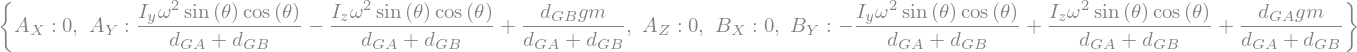

In [28]:
variablesIsolated = [A_X, A_Y, B_X, B_Y, A_Z]
reactions_solve= sm.solve(systemEquations, variablesIsolated)
reactions_solve # this is a dictionary

Now we use the physical parameters to find the numerical values of the reactions exerted by the bearings.

In [29]:
parameters_system = {
  'd_{GA}': 0.2, # distance between gear and bearing A [m]
  'd_{GB}': 0.25, # distance between gear and bearing B [m]
  'm': 10, # mass of the gear [kg]
  'g': 9.81, # acceleration due to gravity [m/s^2]
  'I_x': 0.05, # moment of inertia about x [kg m^2]
  'I_y': 0.05, # moment of inertia about y [kg m^2]
  'I_z': 0.1, # moment of inertia about z [kg m^2]
  'theta': sm.N(sm.rad(-10)), # angle [rad]
  'omega': 30, # angular velocity [rad/s]
}

In [30]:
reactions_solve_numeric = {k: v.subs(parameters_system) for k, v in reactions_solve.items()}
reactions_solve_numeric

Since the parameters were expressed using SI units, the reactions are also in SI units, that is, Newton (N).